In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [2]:
HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
ENSID2Entrez = dict(zip(HGNC["ensembl_gene_id"].values, HGNC["entrez_id"].values))
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))
Entrez2Symbol = dict(zip(HGNC["entrez_id"].values, HGNC["symbol"].values))
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Load Exp Zscore Matrix
ExpMat = "../dat/allen-mouse-exp/energy-conn-model.csv"
ExpMat = pd.read_csv(ExpMat, index_col="ROW")

ExpZscoreMat = "../dat/allen-mouse-exp/energy-zscore-conn-model.csv"
ExpZscoreMat = pd.read_csv(ExpZscoreMat, index_col="ROW")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

In [4]:
ExpMat.head(3)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.089402,0.060138,0.050112,0.023204,0.034093,0.088305,0.036078,NaN,0.046813,0.032990,...,0.035584,0.179587,0.021418,0.030367,0.115622,0.036984,0.053407,0.033779,0.110354,0.134065
2,0.040017,0.014211,0.023246,0.024009,0.403265,0.025202,0.354581,0.058713,0.145883,0.022381,...,0.043141,0.005781,0.213674,0.052746,0.038968,0.016603,0.018719,0.035381,0.122850,1.065840
9,0.148632,0.026984,0.002614,0.022323,0.058371,0.011842,0.058527,0.004481,0.026373,0.290885,...,0.016260,0.003517,0.028695,0.004277,0.214487,0.014443,0.016323,0.020207,0.046851,0.162448


In [13]:
# Load Brainspan expressions
match_feature = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/match-features.csv", index_col="GENE")
match_feature = match_feature.sort_values("EXP")
match_feature["Rank"] = [1+x for x in range(match_feature.shape[0])] # compute Rank

In [14]:
match_feature["quantile"] = match_feature["Rank"]/match_feature.shape[0]

In [15]:
match_feature.to_csv("GeneMatchQuantile.csv")

In [16]:
# Annotate pLI and ranks
pli = pd.read_csv("/Users/jiayao/Work/Resources/fordist_cleaned_exac_r03_march16_z_pli_rec_null_data.txt", delimiter="\t")
#entrez2pLi = dict(zip([GeneSymbol2Entrez[x] for x in pli["gene"].values], pli["pLI"].values))
Entrez2pLI = {}
for i, row in pli.iterrows():
    if row["gene"] in GeneSymbol2Entrez:
        Entrez2pLI[int(GeneSymbol2Entrez[row["gene"]])] = float(row["pLI"])

In [17]:
for g, row in match_feature.iterrows():
    match_feature.loc[g, "pLI"] = Entrez2pLI.get(g, -1)

In [18]:
match_feature["pLI"]

GENE
56300     2.504127e-05
5169      6.437464e-17
7380      1.411302e-07
390999    3.896925e-06
3990      1.711272e-04
              ...     
51617    -1.000000e+00
122706    1.713913e-02
10825     1.640575e-06
7130      4.015248e-06
7846      8.365356e-01
Name: pLI, Length: 15660, dtype: float64

In [19]:
match_feature_HS = match_feature[(match_feature["pLI"] < 0.9) & (match_feature["pLI"] > 0)] 
match_feature_HIS = match_feature[match_feature["pLI"] > 0.9] 
match_feature_failMap = match_feature[match_feature["pLI"] == -1] 

match_feature_HS = match_feature_HS.sort_values("EXP")
match_feature_HS["Rank"] = [1+x for x in range(match_feature_HS.shape[0])] # compute Rank

match_feature_HIS = match_feature_HIS.sort_values("EXP")
match_feature_HIS["Rank"] = [1+x for x in range(match_feature_HIS.shape[0])] # compute Rank
print(match_feature_HIS.shape, match_feature_HS.shape, match_feature_failMap.shape)

(2984, 5) (11649, 5) (1027, 5)


In [20]:
match_feature_HIS.head(2)

,EXP,LENGTH.LOG2,Rank,quantile,pLI
GENE,,,,,
88,0.018577,11.390706,1,0.002490,0.999812
213,0.023470,10.837628,2,0.005428,0.985727


In [21]:
match_feature_HS.head(2)

,EXP,LENGTH.LOG2,Rank,quantile,pLI
GENE,,,,,
56300,0.009033,8.994353,1,0.000064,2.504127e-05
5169,0.009169,11.359750,2,0.000128,6.437464e-17


In [22]:
match_feature.head(3)

,EXP,LENGTH.LOG2,Rank,quantile,pLI
GENE,,,,,
56300,0.009033,8.994353,1,0.000064,2.504127e-05
5169,0.009169,11.359750,2,0.000128,6.437464e-17
7380,0.009705,9.754888,3,0.000192,1.411302e-07


In [80]:
## Match gene set with exp-match genes
asd_ssc = loadgenelist("../dat/genes/Jon.ssc.txt")
df = ExpressionMatchGeneSet(asd_ssc, match_feature)

In [82]:
df.to_csv("dat/asd_ssc_exp_matches_1000.csv")

In [84]:
df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
29123,388403,11083,27072,782,140467,57181,7419,29123,221545,1351,...,81565,140707,23304,59353,9879,10971,221545,726,54329,55621
10438,121355,79781,10160,147111,162993,29920,23569,374907,2018,29777,...,23244,84287,10507,29777,644186,113612,79781,340351,162993,23244


In [24]:
asd_agg = loadgenelist("../dat/genes/asd/agg.FDR0.2.txt")
df = ExpressionMatchGeneSet(asd_agg, match_feature, savefil="dat/matching/asd_agg_exp_matches_1000.csv")

In [112]:
asd_spark = loadgenelist("../dat/genes/Jon.spark.txt")
df = ExpressionMatchGeneSet(asd_spark, match_feature, savefil="dat/asd_spark_exp_matches_1000.csv")

In [113]:
asd_tada = loadgenelist("../dat/genes/Jon.tada.txt")
df = ExpressionMatchGeneSet(asd_tada, match_feature, savefil="dat/asd_tada_exp_matches_1000.csv")

In [161]:
asd_sib = loadgenelist("../dat/genes/asd.sib.entrez.list")
df = ExpressionMatchGeneSet(asd_sib, match_feature, savefil="dat/asd_sib_exp_matches_1000.csv")

In [165]:
asd_asc = loadgenelist("../dat/genes/asd.asc.entrez.list")
df = ExpressionMatchGeneSet(asd_asc, match_feature, savefil="dat/asd_asc_exp_matches_1000.csv")

In [41]:
# matching with pLI
asd_asc = loadgenelist("../dat/genes/asd.asc.entrez.list")
df = ExpressionMatchGeneSetwithpLI(asd_asc, match_feature_HIS, match_feature_HS, savefil="dat/matching/asd_asc_exp_matches_pLI_1000.csv")

27086
23126
51111
287
6734
93986


In [38]:
df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
57680,130733,51368,324,57513,8451,3183,64766,87,9139,10916,...,23500,25862,28952,23160,2969,5007,23505,10914,6165,10613
6326,1147,65264,10730,79784,1282,158763,2009,25921,57187,1434,...,1837,22907,3836,121256,2776,989,9646,25962,23633,4302


In [39]:
asd_spark_tada = loadgenelist("../dat/genes/asd.spark.tada.txt")
df = ExpressionMatchGeneSet(asd_spark_tada, match_feature, savefil="dat/matching/asd_sparktada_exp_matches_1000.csv")

In [42]:
# matching with pLI
asd_spark_tada = loadgenelist("../dat/genes/asd.spark.tada.txt")
df = ExpressionMatchGeneSetwithpLI(asd_spark_tada, match_feature_HIS, match_feature_HS, savefil="dat/matching/asd_sparktada_exp_matches_pLI_1000.csv")

27086
51111
23126
57585


In [109]:
asd_ssc_new_eff = ZscoreAVGWithExpMatch(ExpZscoreMat, asd_ssc, df)

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:274: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  DZzscore = ZscoreMat[STR].loc[np.array(DZgenes)].values


In [110]:
asd_ssc_new_eff = asd_ssc_new_eff.sort_values("EFF_Z", ascending=False)
asd_ssc_new_eff = asd_ssc_new_eff.reset_index()
asd_ssc_new_eff["Rank"] = [x+1 for x in asd_ssc_new_eff.index]
asd_ssc_new_eff.to_csv("dat/asd.ssc.zmatch.rank.csv", index=False)

In [77]:
gene = 476
gene_exp = match_feature.loc[gene, "EXP"]
gene_rank = match_feature.loc[gene, "Rank"]
Interval = match_feature[(match_feature["Rank"] >= gene_rank-100) &
                                (match_feature["Rank"] <= gene_rank+100)]
print(gene_exp, gene_rank, Interval.shape[0])
Interval_genes = Interval.index.values
Interval_exps = Interval["EXP"].values
Interval_genes_probs = assignProb(Interval_exps)
match_genes = np.random.choice(Interval_genes, size = 100, replace=True, p = Interval_genes_probs)

15.640750629108 15344 201


In [78]:
for p in Interval_genes_probs:
    print(p)

4.575293287539193e-14
6.0166405036879045e-06
6.5202367605682585e-06
1.4416345973282906e-05
2.7404735801649015e-05
4.2651960387107076e-05
4.302433895559392e-05
0.00010142776893711864
0.00011083446379461016
0.0001390897748744922
0.00014325251408646978
0.00015396048511785203
0.0001892369757613745
0.00020656163827813056
0.00023029064926824354
0.00024775039062272886
0.0002825678141700824
0.00029620046279692084
0.0003108906962762566
0.0004123685482879233
0.00045964147065600565
0.0005006215340630439
0.0005478593266584684
0.0006979394659313318
0.0006992628530560158
0.0007155107978538404
0.0008130042660580749
0.0008657241941652591
0.0009774098085545036
0.001178303300837958
0.0012859313063491528
0.0013951783592100755
0.0014127466351151034
0.0014209460704110966
0.0014241354121969083
0.001630774745476731
0.0019192215127505313
0.0019228571157905614
0.0021991620319202665
0.0023011433409719523
0.0023185834934122203
0.0027198713857576003
0.002755554096021956
0.0027797198723472504
0.0028049443652888493

In [79]:
sum(Interval_genes_probs[:-1])

0.9999999999999545

In [122]:

asd_ssc_match_df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
GENE,,,,,,,,,,,,,,,,,,,,,
29123,388403,11083,27072,782,140467,57181,7419,29123,221545,1351,...,81565,140707,23304,59353,9879,10971,221545,726,54329,55621
10438,121355,79781,10160,147111,162993,29920,23569,374907,2018,29777,...,23244,84287,10507,29777,644186,113612,79781,340351,162993,23244


In [139]:
asd_ssc_match_df = pd.read_csv("dat/asd_ssc_exp_matches_1000.csv", index_col="GENE")
ssc_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_ssc, asd_ssc_match_df, csv_fil="dat/bias/ssc.explevel.rank.tsv")

In [142]:
ssc_elevel_match.to_csv("dat/bias/ssc.explevel.rank.tsv")

In [140]:
asd_spark_match_df = pd.read_csv("dat/asd_spark_exp_matches_1000.csv", index_col="GENE")
spark_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_spark, asd_spark_match_df, csv_fil="dat/bias/spark.explevel.rank.tsv")

In [143]:
spark_elevel_match.to_csv("dat/bias/spark.explevel.rank.tsv")

In [155]:
asd_tada_match_df = pd.read_csv("dat/asd_tada_exp_matches_1000.csv", index_col="GENE")
tada_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_tada, asd_tada_match_df, csv_fil="dat/bias/tada.explevel.rank.tsv")

In [144]:
tada_elevel_match.to_csv("dat/bias/tada.explevel.rank.tsv")

In [163]:
asd_sib_match_df = pd.read_csv("dat/asd_sib_exp_matches_1000.csv", index_col="GENE")
tada_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_sib, asd_sib_match_df, csv_fil="dat/bias/sib.explevel.rank.tsv")

In [164]:
tada_elevel_match.to_csv("dat/bias/sib.explevel.rank.tsv")

In [181]:
asd_asc_match_df = pd.read_csv("dat/asd_asc_exp_matches_1000.csv", index_col="GENE")
asc_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_asc_match_df.index.values, 
                                      asd_asc_match_df, csv_fil="dat/bias/asc.explevel.rank.tsv")
asc_elevel_match.to_csv("dat/bias/asc.explevel.rank.tsv")

In [194]:
asd_sparktada_match_df = pd.read_csv("dat/asd_sparktada_exp_matches_1000.csv", index_col="GENE")
asd_sparktada_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_sparktada_match_df.index.values, 
                                      asd_sparktada_match_df, csv_fil="dat/bias/sparktada.explevel.rank.tsv")
asd_sparktada_elevel_match.to_csv("dat/bias/sparktada.explevel.rank.tsv")

In [187]:
asc_zmatch_bias = pd.read_csv("dat/bias/asd.asc.zmatch.rank.csv")
tada_zmatch_bias = pd.read_csv("dat/bias/asd.tada.zmatch.rank.csv")
sib_zmatch_bias = pd.read_csv("dat/bias/asd.sib.zmatch.rank.csv")
spark_zmatch_bias = pd.read_csv("dat/bias/asd.spark.zmatch.rank.csv")

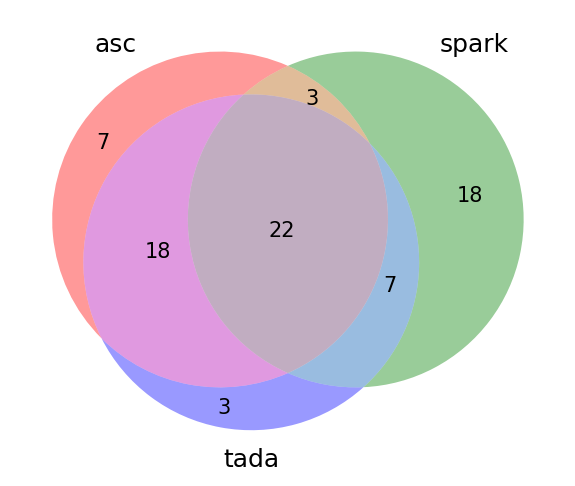

In [188]:
from matplotlib_venn import venn3, venn3_circles
asc_zmatch_str = asc_zmatch_bias.head(50)["STR"].values
spark_zmatch_str = spark_zmatch_bias.head(50)["STR"].values
tada_zmatch_str = tada_zmatch_bias.head(50)["STR"].values
plt.figure(dpi=150)
v = venn3([set(asc_zmatch_str), set(spark_zmatch_str), set(tada_zmatch_str)], 
      set_labels = ('asc', 'spark', 'tada'))

In [189]:
asc_elevel_bias = pd.read_csv("dat/bias/asc.explevel.rank.tsv")
spark_elevel_bias = pd.read_csv("dat/bias/spark.explevel.rank.tsv")
tada_elevel_bias = pd.read_csv("dat/bias/tada.explevel.rank.tsv")
sib_elevel_bias = pd.read_csv("dat/bias/sib.explevel.rank.tsv")

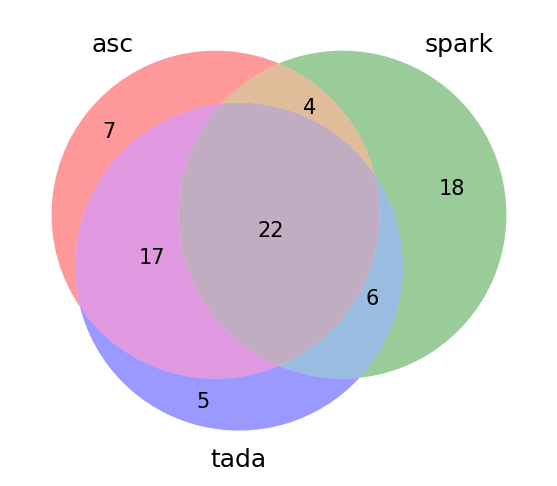

In [190]:
from matplotlib_venn import venn3, venn3_circles
asc_elevel_str = asc_elevel_bias.head(50)["STR"].values
spark_elevel_str = spark_elevel_bias.head(50)["STR"].values
tada_elevel_str = tada_elevel_bias.head(50)["STR"].values
plt.figure(dpi=150)
v = venn3([set(asc_elevel_str), set(spark_elevel_str), set(tada_elevel_str)], 
      set_labels = ('asc', 'spark', 'tada'))

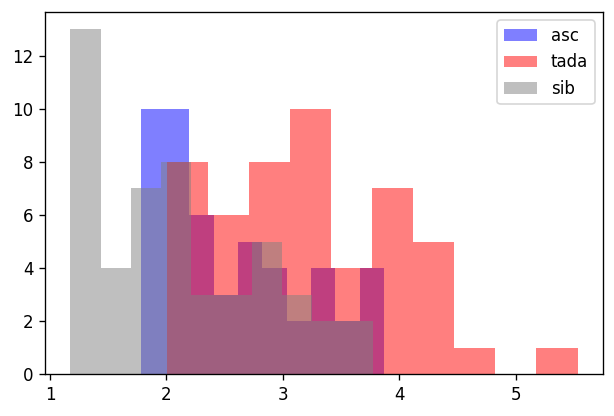

In [171]:
plt.hist(asc_zmatch_bias.head(50)["EFFECT"].values, color="blue", label="asc", alpha=0.5)
plt.hist(tada_zmatch_bias.head(50)["EFFECT"].values, color="red", label="tada", alpha=0.5)
plt.hist(sib_zmatch_bias.head(50)["EFFECT"].values, color="grey", label="sib", alpha=0.5)
plt.legend()